In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url, index_col=0)

print(df.head())
print(df.info())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


In [11]:
#datos nulos
print(df.isnull().sum())

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


In [2]:
#division de conjunto de datos
X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(160, 3)
(40, 3)


In [3]:
#escalamiento de caracterisiticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
#creacion y entrenamiento del modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#prediccion de datos
y_pred = model.predict(X_test_scaled)
print("primeras predicciones")
print(y_pred[:10])

primeras predicciones
[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967]


In [5]:
#evaluacion del modelo
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 3.174097353976106
R-squared: 0.8994380241009119
Root Mean Squared Error: 1.7815996615334506


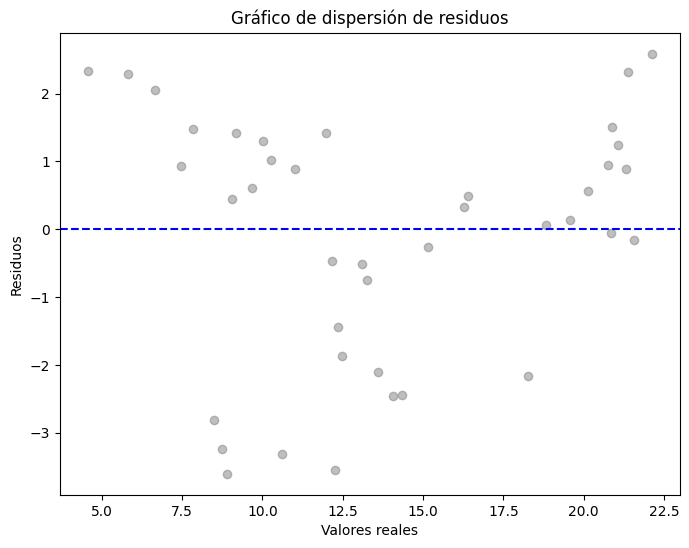

In [10]:
residuos= y_test-y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, color='grey', alpha=0.5)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')
plt.show()